<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:white;
            font-size:130%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:black;
               border:black;
               border-width:2px;
               border-style:solid;
              font-family: Times New Roman;
              text-align:center;'>
         Bank Term Deposit Marketing
    </h3>
    </div>

<b>Problem statement:</b> Identify whether the subject subscribes to a term deposit or not


In [2]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv(r"C:\Users\Varun Sai Kanuri\Downloads\bank (1).txt",sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<b>Data Description:</b> The dataset is from a bank, using which we have to identify whether the subject subscribes to a term deposit or not

The dataset has the following attributes:

1.  age (numeric)
2.  job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.  marital : marital status (categorical: "married","divorced","single"; note: "divorced" meansdivorced or widowed)
4.  education (categorical: "unknown","secondary","primary","tertiary")
5.  default: has credit in default? (binary: "yes","no")
6.  balance: average yearly balance, in euros (numeric)
7.  housing: has housing loan? (binary: "yes","no")
8.  loan: has personal loan? (binary: "yes","no")
9.  contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric,includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previouscampaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success")

<b>Response Variable (desired target):</b>

17. y : has the client subscribed to a term deposit?(binary: "yes","no")


In [6]:
df.rename(columns={'y':'Deposit'},inplace=True)

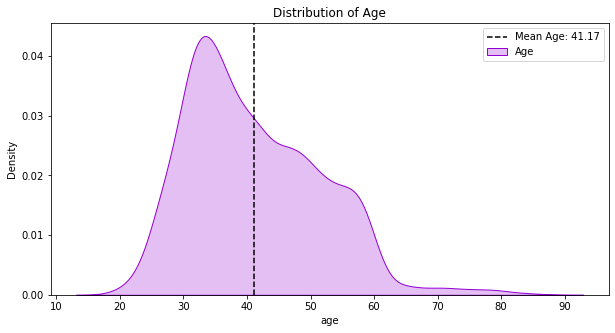

In [7]:
plt.figure(figsize=(10,5))
sns.kdeplot(x=df['age'],color='DarkViolet',shade=True,label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.title('Distribution of Age')
plt.show()

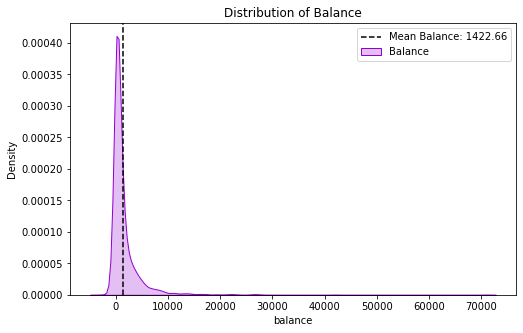

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['balance'],color='DarkViolet',shade=True,label='Balance')
plt.axvline(x=df['balance'].mean(),color='k',linestyle ="--",label='Mean Balance: {}'.format(round(df['balance'].mean(),2)))
plt.legend()
plt.title('Distribution of Balance')
plt.show()

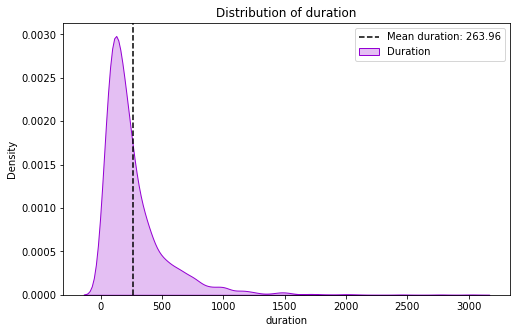

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['duration'],color='DarkViolet',shade=True,label='Duration')
plt.axvline(x=df['duration'].mean(),color='k',linestyle ="--",label='Mean duration: {}'.format(round(df['duration'].mean(),2)))
plt.legend()
plt.title('Distribution of duration')
plt.show()

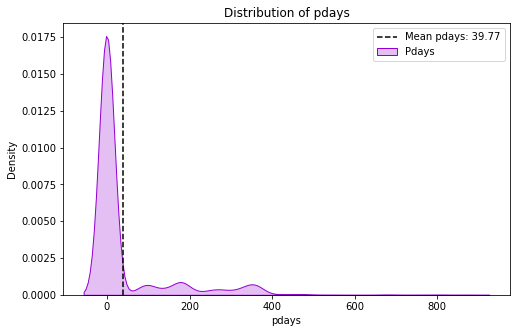

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['pdays'],color='DarkViolet',shade=True,label='Pdays')
plt.axvline(x=df['pdays'].mean(),color='k',linestyle ="--",label='Mean pdays: {}'.format(round(df['pdays'].mean(),2)))
plt.legend()
plt.title('Distribution of pdays')
plt.show()

In [11]:
fig=px.bar(df.job.value_counts().reset_index().rename(columns={'index':'Job','job':'Count'}),x='Job',y='Count',color='Job',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Job type of the Customers',font_family="Times New Roman",title_font_family="Times New Roman")

In [12]:
fig=px.pie(df.marital.value_counts().reset_index().rename(columns={'index':'Marital-Status','marital':'Count'}),names='Marital-Status',values='Count',hole=0.5,template='plotly_white',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Marital-Status')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

In [13]:
fig=px.bar(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),x='Education',y='Count',color='Education',text='Count',template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,legend_title_text='<b>Education',title_text='<b>Education of the customers',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()
fig=px.pie(df.education.value_counts().reset_index().rename(columns={'index':'Education','education':'Count'}),names='Education',values='Count',hole=0.5,template='plotly_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Education')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

In [14]:
fig=go.Figure()
from plotly.subplots import make_subplots
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Credit in Default', 'Housing Loan','Personal Loan'))
fig.add_trace(go.Pie(values=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Count'],labels=df.default.value_counts().reset_index().rename(columns={'index':'Default','default':'Count'})['Default'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Has Credit in Default?',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Count'],labels=df.housing.value_counts().reset_index().rename(columns={'index':'Housing','housing':'Count'})['Housing'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Housing Loan',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Count'],labels=df.loan.value_counts().reset_index().rename(columns={'index':'Loan','loan':'Count'})['Loan'],hole=0.7,marker_colors=['Crimson','ForestGreen'],name='Personal Loan',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text=" ",title_text='<b style="color:black; font-size:100%;">Credit and Loan Analysis',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

In [15]:
fig=px.pie(df.contact.value_counts().reset_index().rename(columns={'index':'Contact','contact':'Count'}),names='Contact',values='Count',hole=0.5,template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Contact')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.show()

In [16]:
fig=px.bar(df.month.value_counts().reset_index().rename(columns={'index':'Month','month':'Count'}),x='Month',y='Count',color='Month',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Last Contact Month of the year',font_family="Times New Roman",title_font_family="Times New Roman")

In [17]:
fig=px.bar(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),x='Poutcome',y='Count',color='Poutcome',text='Count',template='simple_white')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")

In [18]:
fig=px.pie(df.poutcome.value_counts().reset_index().rename(columns={'index':'Poutcome','poutcome':'Count'}),names='Poutcome',values='Count',hole=0.5,template='simple_white',color_discrete_sequence=['grey','red','blue','green'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Outcome of previous marketing Campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

In [19]:
fig=px.pie(df.groupby(['Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),names='Deposit',values='Count',template='ggplot2',hole=0.8)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.4)))
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text='<b>Poutcome')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,title_text='<b>Term Deposits',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(title_x=0.5,legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.show()

In [20]:
fig=px.box(df,x='job',y='age',color='job',template='simple_white',title='<b>Distribution of age based on job type')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Job type")

In [21]:
fig=px.box(df,x='marital',y='age',color='marital',template='simple_white',title='<b>Distribution of age based on Marital Status',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Marital Status")
fig.show()

In [22]:
fig=px.box(df,x='education',y='age',color='education',template='simple_white',title='<b>Distribution of age based on Education Level')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Education Level")
fig.show()

In [23]:
fig=px.box(df,x='default',y='age',color='default',template='simple_white',title='<b>Distribution of age based on Credit in Default',color_discrete_sequence=['LightCoral','DeepSkyBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Credit in Default")
fig.show()

In [24]:
fig=px.box(df,x='housing',y='age',color='housing',template='simple_white',title='<b>Distribution of age based on Housin Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Housing Loan")
fig.show()

In [25]:
fig=px.box(df,x='loan',y='age',color='loan',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Personal Loan Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Personal Loan")
fig.show()

In [26]:
fig=px.box(df,x='Deposit',y='age',color='Deposit',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [27]:
fig=px.box(df,x='Deposit',y='pdays',color='Deposit',template='simple_white',color_discrete_sequence=['LightCoral','DeepSkyBlue'],title='<b>Distribution of pdays based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [28]:
fig=px.box(df,x='Deposit',y='duration',color='Deposit',template='simple_white',color_discrete_sequence=['LightCoral','YellowGreen'],title='<b>Effect of Duration on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [29]:
df['Duration']=df['duration'].apply(lambda x: 'Above_median_Duration' if x>df['duration'].median() else 'Below_median_Duration')
fig=px.bar(df.groupby(['Duration','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='Duration',y='Count',color='Deposit',barmode='group')
fig.show()

In [30]:
df['Duration']=df['duration'].apply(lambda x: 'Above_mean_Duration' if x>df['duration'].mean() else 'Below_mean_Duration')
fig=px.bar(df.groupby(['Duration','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='Duration',y='Count',color='Deposit',barmode='group')
fig.show()

In [31]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

In [32]:
a=df.groupby(['job'],as_index=False)['balance'].mean()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='seaborn')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Average balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

In [33]:
a=df.groupby(['job'],as_index=False)['balance'].median()
a['balance']=round(a['balance'],1)
fig=px.bar(a.sort_values(by='balance',ascending=False),x='job',y='balance',text='balance',color='job',template='seaborn')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,title_text='<b>Median balance of the clients by their job type',legend_title_text='Job Type',font_family="Times New Roman",title_font_family="Times New Roman")

In [34]:
a=df.groupby(['contact','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('contact')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='contact',y='Count',text='percentile',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Contact type on Term Deposits</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [35]:
d=df.groupby(['marital','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Divorced', 'Married','Single'))

fig.add_trace(go.Pie(values=d[d['marital']=='divorced']['Count'],labels=d[d['marital']=='divorced']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Divorced',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=d[d['marital']=='married']['Count'],labels=d[d['marital']=='married']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Married',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=d[d['marital']=='single']['Count'],labels=d[d['marital']=='single']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Single',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_traces(textposition='outside', textinfo='percent+label')

In [36]:
fig=px.bar(df.groupby(['job','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='job',y='Count',text='Count',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,title_text='<b style="color:black; font-size:105%;">Term Depositors based on Job Type</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.show()

In [37]:
fig=px.treemap(df.groupby(['job','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),path=['job','Deposit','Count'],template='simple_white')
fig.update_layout(title_x=0.5,template='simple_white',title_text='<b style="color:black; font-size:100%;">Treemap on count of clients who subscribed the Term Deposits or not based on Job',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [38]:
fig=px.bar(df.groupby(['month','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='month',y='Count',text='Count',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits based on last Contact month',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

In [39]:
a=df.groupby(['poutcome','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percentile']=round(a['Count']*100/a.groupby('poutcome')['Count'].transform('sum'),1)
a['percentile']=a['percentile'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='poutcome',y='Count',color='Deposit',text='percentile',template='simple_white',barmode='group',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.08,template='simple_white',showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Outcome of Previous Marketing Campaign<br><b style="font-family: Times New Roman; font-size:1.0vw">% of term deposits opened based on the outcome of previous campaign',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)),textposition = "outside")
fig.show()

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit,Duration
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Below_Average_Duration
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Below_Average_Duration
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Below_Average_Duration
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Below_Average_Duration
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Below_Average_Duration


In [41]:
k=df.groupby(['housing','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
k

,housing,Deposit,Count
0,no,no,1661
1,no,yes,301
2,yes,no,2339
3,yes,yes,220


In [42]:
k=df.groupby(['housing','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['housing']=='yes']['Count'],labels=k[k['housing']=='yes']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Housing Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['housing']=='no']['Count'],labels=k[k['housing']=='no']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Housing loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Housing Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')

In [43]:
k=df.groupby(['loan','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
fig=go.Figure()
fig=make_subplots(rows=1,cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=k[k['loan']=='yes']['Count'],labels=k[k['loan']=='yes']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Having Personal Loan',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=k[k['loan']=='no']['Count'],labels=k[k['loan']=='no']['Deposit'],hole=0.7,marker_colors=['MediumPurple','YellowGreen'],name='Not having Personal loan',showlegend=True),row=1,col=2)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Deposit",title_text='<b style="color:black; font-size:100%;">Term Deposits based on Personal Loan',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.add_annotation(dict(x=0.15, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Have a Loan</b>"))
fig.add_annotation(dict(x=0.83, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>No Loan</b>"))
fig.update_traces(textposition='outside', textinfo='percent+label')

In [44]:
fig=px.box(df,x='poutcome',y='pdays',color='poutcome',template='simple_white',title='<b>Effect of pdays on poutcome',color_discrete_sequence=['Gray','OrangeRed','BlueViolet','LimeGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Credit in Default")
fig.show()

In [45]:
fig=px.box(df,x='poutcome',y='pdays',color='Deposit',template='simple_white',title='<b>Effect of pdays on poutcome and term deposits',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Credit in Default")
fig.show()

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Deposit,Duration
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Below_Average_Duration
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Below_Average_Duration
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Below_Average_Duration
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Below_Average_Duration
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Below_Average_Duration


In [47]:
px.line(df.groupby(['age','Deposit'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='Deposit')

In [48]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

In [49]:
df['Balance']=df['balance'].apply(lambda x: 'Above_Average' if x>=df['balance'].mean() else 'Below_Average')
a=df.groupby(['Balance','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Balance')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Balance',y='Count',text='percent',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Balance on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average balance and below average balance</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.show()

In [50]:
fig=px.line(df.groupby(['age','Deposit'],as_index=False)['job'].count().rename(columns={'job':'Count'}),x='age',y='Count',color='Deposit',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Age on Term Deposits')
fig.show()

In [51]:
df['Duration']=df['duration'].apply(lambda x: 'Above_Average_Duration' if x>=df['duration'].mean() else 'Below_Average_Duration')
a=df.groupby(['Duration','Deposit'],as_index=False)['age'].count().rename(columns={'age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Duration')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Duration',y='Count',text='percent',color='Deposit',barmode='group',template='simple_white',color_discrete_sequence=['MediumPurple','YellowGreen'])
fig.update_layout(legend_title_text='<b>Deposit Status:</b>',title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Duration on Term Deposits</b><br><b style="font-family: Times New Roman; font-size:1.02vw">By taking the above average duration and below average duration</b>',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_layout(legend=dict(orientation='v',yanchor='middle',y=1.02,xanchor='right',x=1))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout(title_x=0.08,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside')
fig.add_annotation(
  x=0.23, 
  y=600, 
  ax=0.26,
  ay=1205,
  xref='x',
  yref='y',
  axref='x',
  ayref='y',
  text='if the <b style="color: SaddleBrown;">duration</b> is above average then <br><b style="color: Green;">25.7 %</b> of clients are <b style="color: Green;">subscribed</b> <br>to <b style="color: MediumSlateBlue;">term deposits</b> and <b style="color: red;">74.23 %</b><br> are <b style="color: red;">not subscribed</b>',  # if you want only the arrow
  showarrow=True,
  arrowhead=3,
  arrowsize=1,
  arrowwidth=1,
  arrowcolor='black'
)
fig.show()